<a id='top'></a>

# CSCI3022 S21
# Homework 2: Data Wrangling and Visualizations
***

**Name**: ________________________________________________________________________

***

This assignment is due on Canvas by **MIDNIGHT on Monday, February 8**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<a id='p1'></a>

## (25 pts) Problem 1: Data (Probability and Histograms)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [2]:
filepath = '../Data/titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the probability of survival.

$$P(Survived=1)$$

In [ ]:
filepath = 'titanic_data.csv'
df = pd.read_csv(filepath)
df.head()
# print(df.keys())
print("Solution: " + str(df["Survived"].sum()/df["Survived"].count()))

**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

**SOLUTION**

If there were class warfare, we would expect that the first class is asserting its privilege over the lower classes, so first class passengers should be more likely to survive.  If there were chivalry, it would be the case that men have lower survival rates than women.  These are not mutually exclusive.

**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [3]:
dfTitanic = df.dropna(subset=["Survived", "Pclass", "Age", "Sex"])
#dfTitanic.head()
dfTitanic.shape

**Part D**: Compute the probability of survival according to class, gender, and all combinations of the two variables.  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [4]:
print("SOLUTION")

for sex in ["male", "female"]:
    survived = dfTitanic.loc[(dfTitanic["Sex"]==sex), "Survived"].sum()
    total = len(dfTitanic.loc[(dfTitanic["Sex"]==sex), "Survived"])
    print("{:>6} Survived: {:.0f}, Total: {:.0f}, Survival Fraction: {:.3f}".format(sex, survived, total, survived/total))

for pc in [1,2,3]:
    survived = dfTitanic.loc[(dfTitanic["Pclass"]==pc), "Survived"].sum()
    total = len(dfTitanic.loc[(dfTitanic["Pclass"]==pc), "Survived"])
    #print(pc, sex, survived, total)
    print("Class {} Survived: {:.0f}, Total: {:.0f}, Survival Fraction: {:.3f}".format(pc, survived, total, survived/total))
        
for pc in [1,2,3]:
    for sex in ["male", "female"]:
        survived = dfTitanic.loc[(dfTitanic["Pclass"]==pc) & (dfTitanic["Sex"]==sex), "Survived"].sum()
        total = len(dfTitanic.loc[(dfTitanic["Pclass"]==pc) & (dfTitanic["Sex"]==sex), "Survived"])
        #print(pc, sex, survived, total)
        print("Class {} {:>6} Survived: {:.0f}, Total: {:.0f}, Survival Fraction: {:.3f}".format(pc, sex, survived, total, survived/total))

**Typeset your responses here**

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `navy` (as they were eventually rescued by ships) and those who passed away with `sandybrown`.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

In [5]:
my_bins = range(0,80,5)
fig, ax = plt.subplots(figsize=(12,6))
dfTitanic.loc[dfTitanic["Survived"]==1].hist(column="Age", ax=ax, facecolor="navy", edgecolor="white",bins=my_bins, alpha=0.5, label="Survived", density=True)
dfTitanic.loc[dfTitanic["Survived"]==0].hist(column="Age", ax=ax, facecolor="sandybrown", edgecolor="white",bins=my_bins, alpha=0.3, label="Died", density=True)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title("Passenger Age", fontsize=24)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend();

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**Solution:**

It would be misleading to plot these as frequency histograms because there are many more passengers who did not survive the disaster (about 2/3 of them), so the frequency histogram for that data subset would have more area than the frequency histogram for the surviving passengers.

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

**EXAMPLE**
Women tended to survive more than men, so it appears that the men were being chivalrous and making sure that the women got off the boat first. On the other hand, the first class folks were far more likely to survive. We also saw some sort of age bias in survival for the "young adults", which could be due to a conscious attempt or it could be due to a simple healthiness effect (children and older folks may not have been able to handle the arctic waters). It could be a mix of all of these factors. However, it is also entirely possible that we need more information. For example, perhaps the person's location on the ship would be a good item to study in relation to survival.

[Back to top](#top)
<a/ id='p2'></a>

## (20 pts) Problem 2: Data (Box Plots and Outliers)
***

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `BoulderPrecip.csv` from the course page for the last 120 years of monthly precipitation data from Boulder.  Let's take a look!

In [6]:
dfPrecip = pd.read_csv('../Data/boulder_precip_12021.csv')
dfPrecip.head()


,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.40,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.30,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,Tr,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.60,1.06,0.08,0.70,17.78


**Part A:** SCRUBBING!  Our data set is going to be tough to use for a few reasons.

1) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

2) 2021 isn't over yet!  We have one row at the bottom that isn't fully complete and blank values are filling the months that haven't happened yet.  This can wreak havoc on some of our methods!  **Drop** the 2021 data entirely.

3) You may have some object typing issues relating to columns that contained both "Tr"/"NA" and numeric values.  Ensure that Python is treating all of your data as numeric! (see `df.dtypes`)

In [7]:
#1: using .replace (this is doable with .loc, but harder and may require a loop)
df=dfPrecip.replace('Tr', 0.0)

#2: also doable using df.drop
df=df[:-1]
# print(df.tail(2))

#3 using an intermediate function and .apply.  There are other ways!
def fix_month(val):
    val=str(val).replace('*','')
    num = pd.to_numeric(val)  
    return num 

for data in df:
    df[data]=df[data].apply(fix_month)


**Part B:** Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

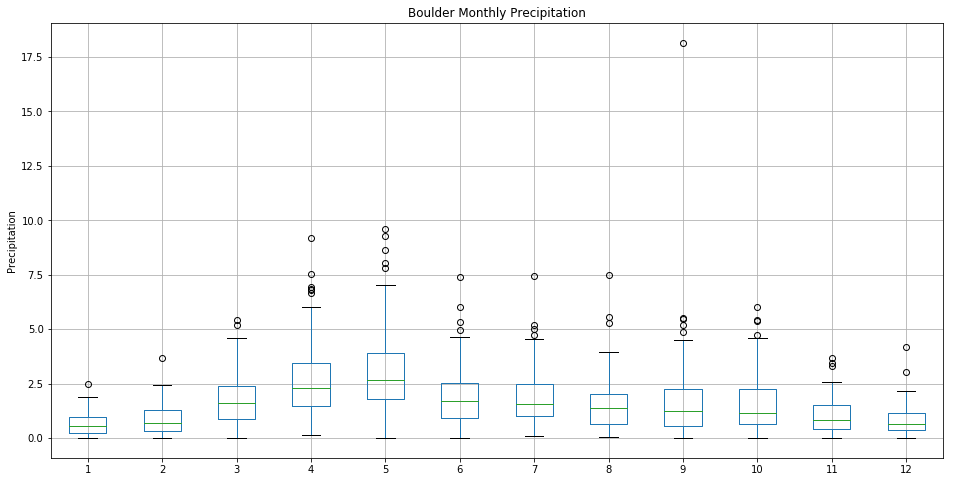

In [8]:
# Easiest way: pandas boxplot
fig,ax = plt.subplots(figsize=(16,8))
df.iloc[:,1:13].boxplot()
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
ax.set_ylabel("Precipitation")
ax.set_title("Boulder Monthly Precipitation")

plt.show()



**Part C:** Spring is the wet season in Boulder.   But what is Spring?

Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring including March, April, and May; and so forth.

The solar year, however, says that Spring runs from near the end of March until near the end of June: let's round at the nearest month and say that it includes the months of April, May and June.

Generate a box plot with precipitation on the y-axis and the two possible monthly 'Spring' groupings (March-May versus April-June) as the x-axis.

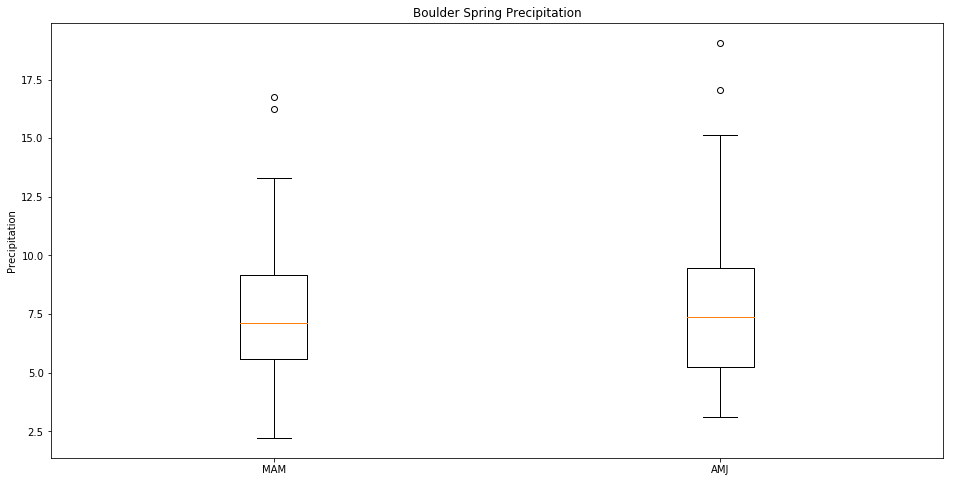

In [9]:
#making new objects:
MAM=df['MAR']+df['APR']+df['MAY']
AMJ=df['APR']+df['MAY']+df['JUN']

# now using mpl boxplot
fig,ax = plt.subplots(figsize=(16,8))
plt.boxplot([MAM,AMJ])
ax.set_xticklabels(['MAM','AMJ'])
ax.set_ylabel("Precipitation")
ax.set_title("Boulder Spring Precipitation")

plt.show()

**Part D:** These might look pretty similar!  Highlight and comment on any differences by calculating the mean, standard deviation, and a Tukey five number summary of each classification of Spring.  Is there a reason here to favor one grouping over the other?

In [10]:
#Code hereprint(AMJ.describe())
print([AMJ.mean(), AMJ.std(ddof=1)])

print(MAM.describe())
print([MAM.mean(), MAM.std(ddof=1)])

[7.68099173553719, 2.9275944063794874]
count    121.000000
mean       7.525868
std        2.726948
min        2.210000
25%        5.600000
50%        7.110000
75%        9.170000
max       16.750000
dtype: float64
[7.5258677685950435, 2.7269475210148704]


***
**Solution:**
The March-April-May grouping has a higher mean and higher standard deviation: as a whole March is wetter than June but also more volatile.  This increased dispersion is also present in a wider interquartile range.  If we revist the histogram in part C, we should notice both March and June are considerably less wet than April/May in Boulder.  Given this, we could maybe argue that the MAM classification is better just based on the slightly higher average: since April and May are the wettest and most volatile months here, we should probably group the wetter and most volatile of March/June in with them, which would lead to the MAM classification over AMJ.

Realistically though, it probably doesn't matter much!  April-May are the true Spring months, at least as measured by precipitation.
***

**Part E:** Create a density histogram of the September precipitation.  Classify and describe this histogram, including discussion of any skewness, multimodality, or outliers.  Find the data point associated with September, 2013, and recreate your histogram with that value in a different color or otherwise clearly marked.

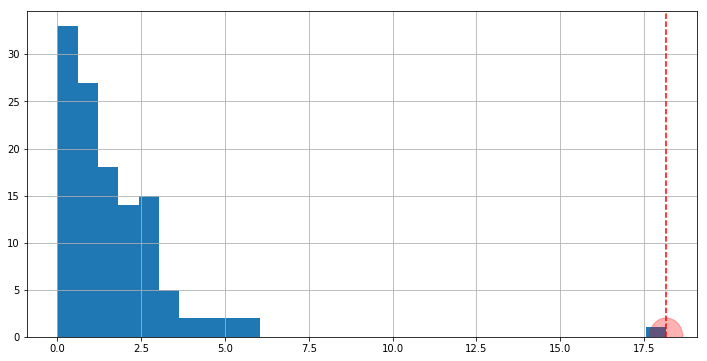

In [36]:
#make histogram
fig, ax = plt.subplots(figsize=(12,6))
df['SEP'].hist(bins=30)
#find that value
lottarain=float(df.loc[df['Year']==2013,'SEP'])
ax.axvline(x=lottarain, linestyle='dashed',color='r')

#alternatively, you can circle the area, or recolor that box...
import matplotlib
circle=matplotlib.patches.Ellipse((lottarain,0),1,4, color='red', alpha=.3)
ax.add_patch(circle)

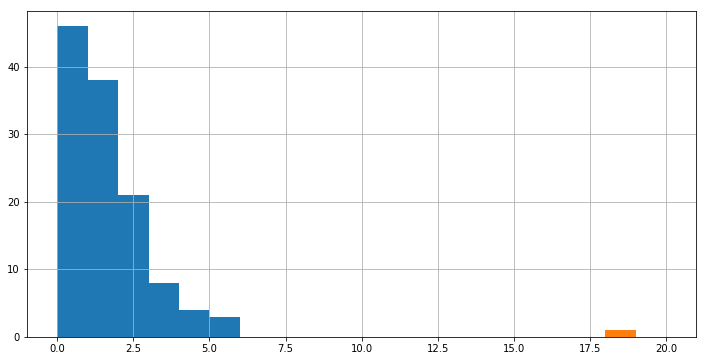

In [58]:
#make histogram
SEP_all= df['SEP']
SEP_outlier = df['SEP'][113]

#make histogram by stacking just the other data set on the same bins
bins=np.linspace(0,20,21)
fig, ax = plt.subplots(figsize=(12,6))
df['SEP'].hist(bins=bins)
df2=pd.Series(SEP_outlier)
df2.hist(bins=bins)
#find that value
# lottarain=float(df.loc[df['Year']==2013,'SEP'])
# ax.axvline(x=lottarain, linestyle='dashed',color='r')



***
**Solution:**
This histogram is unimodal and right-skewed, with a single extreme outlier more than 10 inches from the nearest other data value.
***

**Part F:** That one data point in September 2013 is pretty out there!  Compute the mean and standard deviation of the September precipitation values, then compute them again while excluding the 2013 observation.  How much did each change?

If someone were to ask you about the average weather in September, what would you respond?



In [73]:
# September code here
print('Original Mean', np.mean(df['SEP']))
print('Original St Dev', np.std(df['SEP'], ddof=1))


nooutlier=pd.Series(df['SEP']).drop(113)
print('Adjusted Mean', np.mean(nooutlier))
print('Adjusted St Dev', np.std(nooutlier, ddof=1))



Original Mean 1.6884297520661153
Original St Dev 1.9751379733512553
Adjusted Mean 1.5511666666666664
Adjusted St Dev 1.2786772204796917


They change by a lot!  Usually September isn't too variable, but there's some very small risk of really extreme events, which can make it hard to describe the data with just those two numbers.  The mean raises by .13 - or almost 10\% - just from one observation that's less than 1\% of the data!

[Back to top](#top)